In [1]:
# sympy imports for calculation and nice display: 
from sympy.interactive.printing import init_printing
from sympy.matrices import *
from sympy.plotting import plot3d
from sympy import *
init_printing(use_unicode=False, wrap_line=False, no_global=True)

# For matplotlib plotting functionality (sympy has no nice contour etc...)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# for non-standard color maps
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D 

# Some house holding: 
%config InlineBackend.figure_format = 'retina' # (doubles the plot dpi)

# to suppress unwanted warnings in the notebook...
import warnings
warnings.filterwarnings('ignore')

# for interactive graphing: 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import modules.oiplib as oiplib

In [44]:
#symbols defined
x,y,z = symbols('x y z')
a,b = symbols('a b', real = True)
i = symbols('i', cls = Idx)

In [45]:
#function declared
f = (a-x)**2 + b*(y-x**2)**2

In [46]:
f

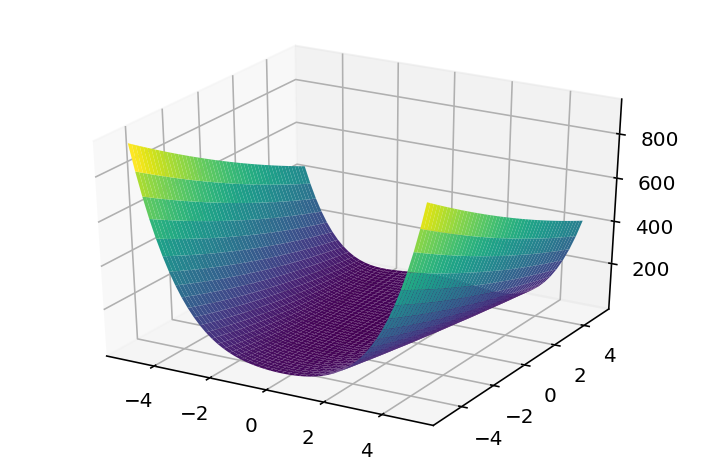

In [5]:

ymin = -5
ymax = 5
xmin = -5
xmax = 5
plot3d(f.subs([(a,1),(b,1)]) , (x, xmin, xmax), (y, ymin, ymax));


In [6]:
#data collected
datapath = '../data/Experimental_Data_xy_Group2.txt'

dataset = np.genfromtxt(fname = datapath, delimiter=',')

In [7]:
dataset

array([[   -1.8     ,    -1.62    ,  1235.934   ],
       [   -1.8     ,    -1.587273,  1217.939   ],
       [   -1.8     ,    -1.554545,  1203.722   ],
       ..., 
       [    1.8     ,     1.554545,   148.6357  ],
       [    1.8     ,     1.587273,   142.4473  ],
       [    1.8     ,     1.62    ,   135.4437  ]])

In [8]:
#data set plotted

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

#for i in range(len(dataset)):
#    xs = dataset[i,0]
#    ys = dataset[i,1]
#    zs = dataset[i,2]
#    ax.scatter(xs, ys, zs, marker = '.')

#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')

#display(fig)

In [9]:
#rearrange equation so that each summation term can be found

r = z - f

l = r**2

eqn = collect(expand(l),[a,b])
display(eqn)

In [10]:
#Least square method is given by the minimum of sum of r__i**2, where r__i is the distance of a point
#from a function:
# ri = zi - f(x,y)

#since we have a function with parameters a and b  --> f(x,y) = (a-x)**2 + b*(y-x**2)**2
#and we have the data set of points zi, xi and yi, we can create a new function r(a,b) as sum of 
#ri**2 for all the elements of the dataset.

# by sympy (and then by hand, to account for sympy's inability to factors multivariate terms a^2*b and a*b),
#the function was expanded, and all the a and b terms of r(a,b) factorized out so that the finite sums
# are now coefficients of all the terms of r(a,b). Those coefficients are then computed using the following cell

#iteration loops to create constants

b2co = 0
bco = 0
ba2co = 0
baco = 0
aco = 0
a2co = 0
a3co = 0
contco = 0
num = len(dataset)


for i in range(len(dataset)):
    
    #x value
    x = dataset[i,0]
    
    #y value
    y = dataset[i,1]
    
    #z value
    z = dataset[i,2]
    
    
    #all these variables are the finite sum coefficients of each term of the least square function
    
    #sum(x**8-4*x**6*y + 6*x**4*y**2 - 4**2*y**3 + y**4)
    b2co = b2co + x**8-4*x**6*y + 6*x**4*y**2 - 4**2*y**3 + y**4
    
    #sum(2*x**6-4*x**4*y-2*x**4*z + 2*x**2*y**2 + 4*x**2*y*z-2*y**2*z)
    bco = bco + 2*x**6-4*x**4*y-2*x**4*z + 2*x**2*y**2 + 4*x**2*y*z-2*y**2*z
    
    #sum(2*x**2 - 4*x**2*y + 2*y**2)
    ba2co = ba2co + 2*x**2 - 4*x**2*y + 2*y**2
    
    #sum(-4*x**5+8*x**3*y-4*x*y**2)
    baco = baco + -4*x**5+8*x**3*y-4*x*y**2
    
    #sum(-4*x**3-4*x*z)
    aco = aco + -4*x**3-4*x*z
    
    #sum(6*x-2*z)
    a2co = a2co + 6*x-2*z
    
    #sum((4*x))
    a3co = a3co + (4*x)
    
    #sum(x**4-2*x**2*z+z**2)
    contco = contco + x**4-2*x**2*z+z**2
     

# function r(a,b) is now multiplied by each of its coeffecients. In full, r is:
# b**2 * sum(x**8-4*x**6*y + 6*x**4*y**2 - 4**2*y**3 + y**4) + 
# b * sum(2*x**6-4*x**4*y-2*x**4*z + 2*x**2*y**2 + 4*x**2*y*z-2*y**2*z) - ...
# b*a**2 * sum(2*x**2 - 4*x**2*y + 2*y**2) + b*a* sum(-4*x**5+8*x**3*y-4*x*y**2) + ... 
# a*sum(-4*x**3-4*x*z) + a**2 * sum(6*x-2*z) - a**3* sum((4*x)) + n*a**4 + sum(x**4-2*x**2*z+z**2)

    
qw = b**2*b2co + b*bco + b*a**2*ba2co + b*a*baco + a*aco + a**2*a2co - a**3*a3co + num*a**4 + contco
display(qw)

In [11]:
def symbolic_error_function(dataset):
    import sympy as sp
    
    #Error function generator, using least square method


    #Least square method is given by the minimum of sum of r__i**2, where r__i is the distance of a point
    #from a function:
    # ri = zi - f(x,y)

    #since we have a function with parameters a and b  --> f(x,y) = (a-x)**2 + b*(y-x**2)**2
    #and we have the data set of points zi, xi and yi, we can create a new function r(a,b) as sum of 
    #ri**2 for all the elements of the dataset.

    # by sympy (and then by hand, to account for sympy's inability to factors multivariate terms a^2*b and a*b),
    #the function was expanded, and all the a and b terms of r(a,b) factorized out so that the finite sums
    # are now coefficients of all the terms of r(a,b). Those coefficients are then computed using the following cell

    a,b = sp.symbols('a b')
    
    
    #iteration loops to create constants

    b2co = 0
    bco = 0
    ba2co = 0
    baco = 0
    aco = 0
    a2co = 0
    a3co = 0
    contco = 0
    num = len(dataset)


    for i in range(len(dataset)):

        #x value
        x = dataset[i,0]

        #y value
        y = dataset[i,1]

        #z value
        z = dataset[i,2]


        #all these variables are the finite sum coefficients of each term of the least square function

        #sum(x**8-4*x**6*y + 6*x**4*y**2 - 4**2*y**3 + y**4)
        b2co = b2co + x**8-4*x**6*y + 6*x**4*y**2 - 4**2*y**3 + y**4

        #sum(2*x**6-4*x**4*y-2*x**4*z + 2*x**2*y**2 + 4*x**2*y*z-2*y**2*z)
        bco = bco + 2*x**6-4*x**4*y-2*x**4*z + 2*x**2*y**2 + 4*x**2*y*z-2*y**2*z

        #sum(2*x**2 - 4*x**2*y + 2*y**2)
        ba2co = ba2co + 2*x**2 - 4*x**2*y + 2*y**2

        #sum(-4*x**5+8*x**3*y-4*x*y**2)
        baco = baco + -4*x**5+8*x**3*y-4*x*y**2

        #sum(-4*x**3-4*x*z)
        aco = aco + -4*x**3-4*x*z

        #sum(6*x-2*z)
        a2co = a2co + 6*x-2*z

        #sum((4*x))
        a3co = a3co + (4*x)

        #sum(x**4-2*x**2*z+z**2)
        contco = contco + x**4-2*x**2*z+z**2


    # function r(a,b) is now multiplied by each of its coeffecients. In full, r is:
    # b**2 * sum(x**8-4*x**6*y + 6*x**4*y**2 - 4**2*y**3 + y**4) + 
    # b * sum(2*x**6-4*x**4*y-2*x**4*z + 2*x**2*y**2 + 4*x**2*y*z-2*y**2*z) - ...
    # b*a**2 * sum(2*x**2 - 4*x**2*y + 2*y**2) + b*a* sum(-4*x**5+8*x**3*y-4*x*y**2) + ... 
    # a*sum(-4*x**3-4*x*z) + a**2 * sum(6*x-2*z) - a**3* sum((4*x)) + n*a**4 + sum(x**4-2*x**2*z+z**2)


    qw = b**2*b2co + b*bco + b*a**2*ba2co + b*a*baco + a*aco + a**2*a2co - a**3*a3co + num*a**4 + contco
    display(qw)
    
    return qw, a, b

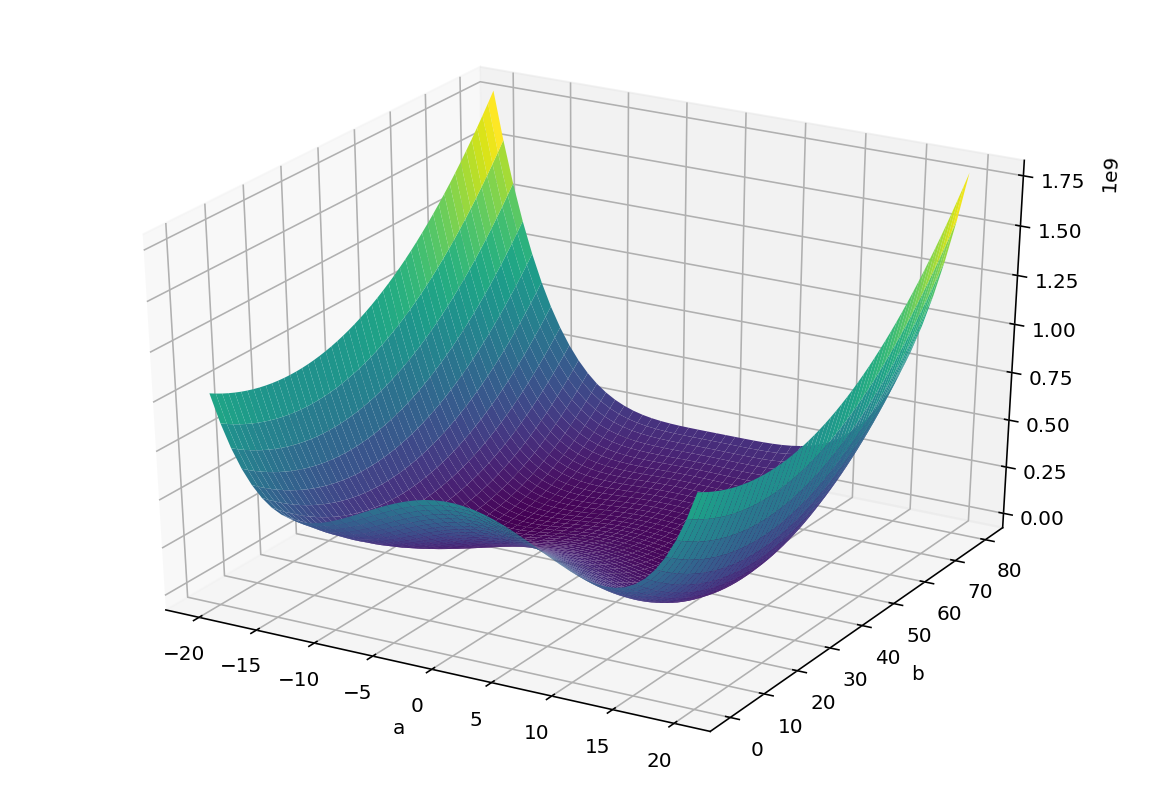

In [12]:
#visualisaton for error function in a-b parameter space
amin = -20
amax = 20
bmin = 0
bmax = 80

#adjust size of figure
plt.rcParams['figure.figsize'] = 10, 7

plot3d(qw , (a, amin, amax), (b, bmin, bmax), xlabel = 'a', ylabel = 'b', zlabel = 'error', autoscale = True);


In [13]:
f = Function('f')

In [14]:
i = symbols('i', cls = Idx)
x = IndexedBase('x')
y = IndexedBase('y')
z = IndexedBase('z')


In [15]:
x[i]

In [16]:
f = Lambda((x[i],y[i],a,b), (a-x[i])**2 + b*(y[i]-x[i]**2)**2 )

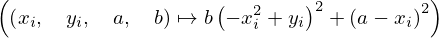

In [17]:
f

In [18]:
error = Function('error')

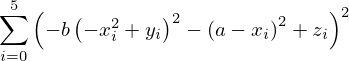

In [19]:
Sum((z[i]-f(x[i],y[i],a,b))**2, (i,0,5))

In [20]:
#datasum = Sum((z[i]-f(x[i],y[i],a,b))**2, (i,0,range(len(dataset))))

In [21]:
#datasum

In [22]:
#S.subs(N, 2).doit().subs([(A[i], i**2) for i in range(3)])

In [23]:
#datasum.subs()

In [24]:
#datasum.doit().subs((z[i], dataset[i,2]) for i in range(6))

In [25]:
# datasum = Sum((z[i]-f(x[i],y[i],a,b))**2, (i,0,100))

# temp = datasum.doit().subs(
#                     ([(z[i], dataset[i,2]) for i in range(101)])
#                     )

# temp = temp.doit().subs(
#                     ([(y[i], dataset[i,1]) for i in range(101)])
#                     )

# temp = temp.doit().subs(
#                     ([(x[i], dataset[i,0]) for i in range(101)])
#                     )



In [26]:
#temp

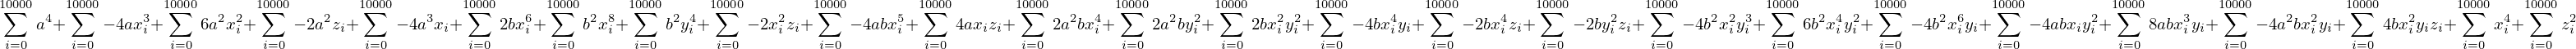

In [27]:
step = Sum((z[i]-f(x[i],y[i],a,b))**2,(i,0,10000)).expand()
step

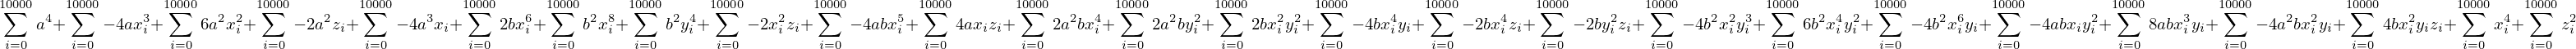

In [28]:
collect(step,a)

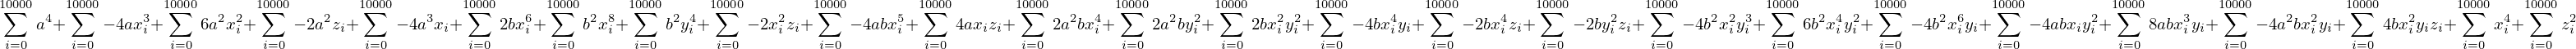

In [29]:
step.factor()

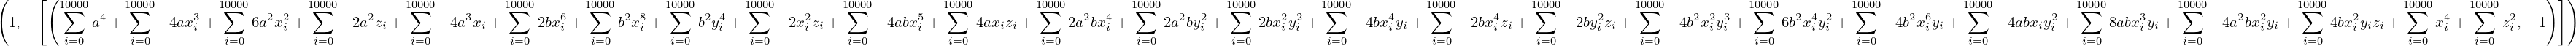

In [30]:
factor_list(step)

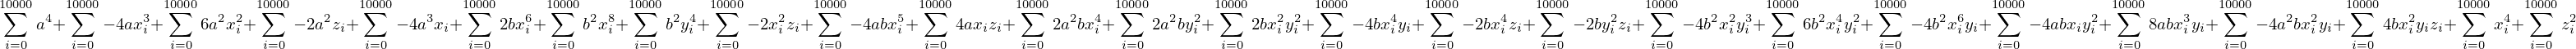

In [31]:
step

In [32]:
step2 = factor_terms(step)

In [33]:
eqn = collect(step2,[a,b])

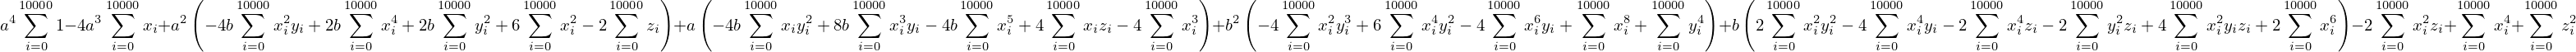

In [34]:
eqn

In [35]:
# when using this approach, and substituting the dataset values 
# into eqn to visualize a b space, this method becomes unfeasible
# because it takes too long to compute.

# in order to visualize the the symbolic function generator 

In [38]:
swarm = oiplib.ParticleSwarm(oiplib.fitness_function, (amin,bmin), (amax,bmax) )

In [39]:
swarm.run()

In [40]:
swarm.bestValue

In [42]:
swarm.bestPosition[1]

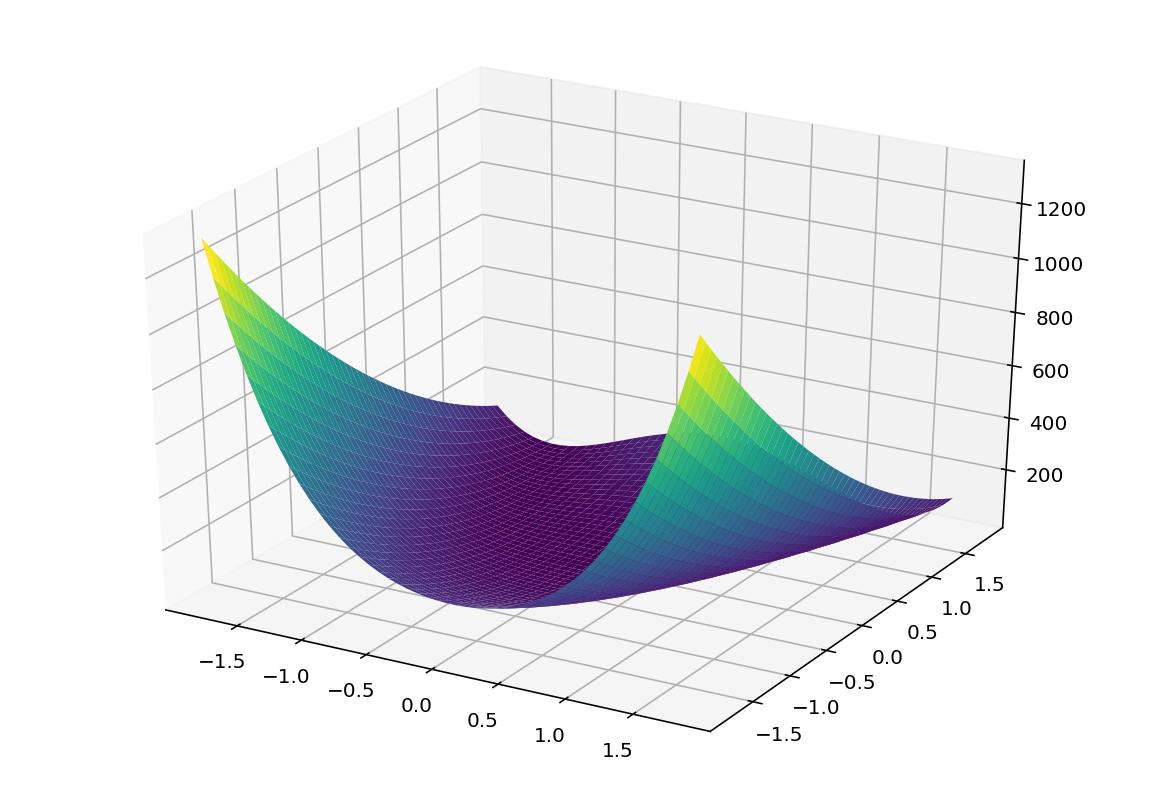

In [51]:

ymin = -1.8
ymax = 1.8
xmin = -1.8
xmax = 1.8
plot3d(f.subs([(a,swarm.bestPosition[0]),(b,swarm.bestPosition[1])]) , (x, xmin, xmax), (y, ymin, ymax));

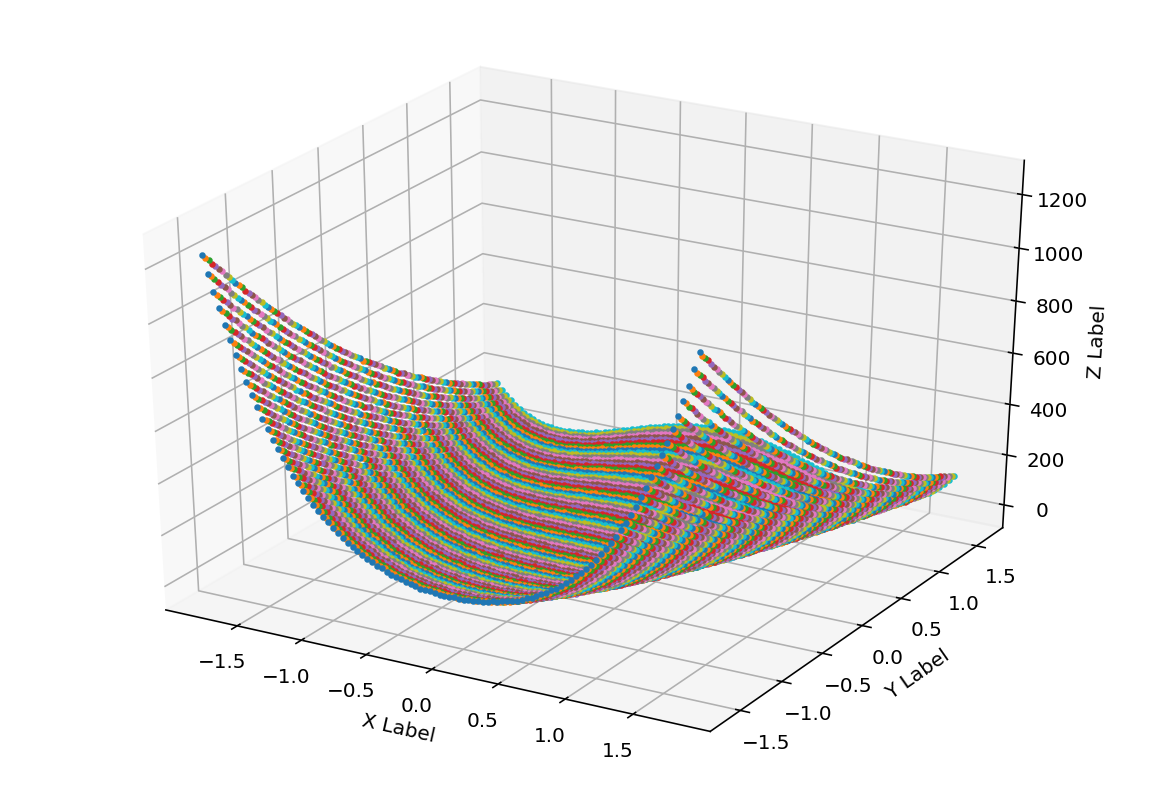

In [49]:
#data set plotted

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(dataset)):
   xs = dataset[i,0]
   ys = dataset[i,1]
   zs = dataset[i,2]
   ax.scatter(xs, ys, zs, marker = '.')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

display(fig)